# <div style=" text-align: center; font-weight: bold">Phase 03: Exploratory data analysis</div>


## **1. Import necessary Python modules**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import re
import json
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


## **2. Ask meaningful questions**
### **2.1 Read the data from file**
First, read the clean data that we cleaned before to a dataframe.

In [28]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')
real_estate_for_sale_df.head()

,Type,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Furniture,Legal,Posting date,District,Project
0,Căn hộ chung cư,161.08,1.798000e+10,3.0,3.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-06,1,Dự án Zenity
1,Căn hộ chung cư,116.00,9.800000e+09,3.0,2.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-03,1,Dự án Zenity
2,Căn hộ chung cư,77.00,6.000000e+09,2.0,2.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-01,1,Dự án Zenity
3,Căn hộ chung cư,76.00,6.200000e+09,2.0,2.0,3.0,Nội thất đầy đủ,Hợp đồng mua bán,2023-12-05,2,Dự án Lumiere Riverside
4,Căn hộ chung cư,95.00,7.600000e+09,2.0,2.0,3.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-07,1,Dự án Zenity


### **2.2 Question 01: How the numbers of real estate is distributed by the district in Ho Chi Minh City? Which district have the most real estate? Which type of real estate is the signature for each district?**

- **Meaning of the question:** By answering this question, we will know which district in Ho Chi Minh City will contain many real estate. From that, like a buyer, we can choose the potential and the location of the real estate we want.

First, let's extract the column `Type` and `District` of dataframe.

In [29]:
real_estate_by_district_df = real_estate_for_sale_df[['Type', 'District']]

#### **1.1 Number of real estates in each district**
Now, we will see how the real estate is distributed by the district. We will use bar chart to show the number of real estates are currently in a district.

In [30]:
district_count = real_estate_by_district_df['District'].value_counts().reset_index()

In [31]:

district_count.sort_values(ascending = False ,by='count', inplace= True)

fig = px.bar(district_count,
              x='count',
              y='District', orientation='h', color='count',
             color_continuous_scale='viridis_r', title='<b>IDE used on a regular basis</b>',
             labels={'count': '<b>Count</b>', 'District': '<b>District</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 1000,
               height = 800,
               margin=dict(l=20, r=30, t=70, b=20),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "  ")
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0, hovertemplate='<b>%{x}</b> real estates are located in <b>district %{y}</b>')
fig.show(config=dict({'scrollZoom':False}))

Through the plot, we can see most of the real estate for sale are in `District 7`, `District 2`, `District 9`, `Bình Thạnh`. So these districts contain most of the percentage of the real estate. This indicates that I we want to get more selection of real estate, these districts are potential locations.


#### **1.2 Distribution of real estates' types in each district**
Now, let's see which is the signature type for each district.     
For this, we will find the percentage of each type of real estate that located at a district

In [32]:
district_type_df = real_estate_for_sale_df[['Type', 'District']]
district_type_df = district_type_df.groupby('District')['Type'].value_counts().reset_index(name = 'Count')

district_type_df.loc[:, 'Percentage'] = (district_type_df.loc[:,'Count'] / district_type_df.groupby('District')['Count'].transform('sum'))*100
district_type_df.loc[:, 'Percentage'] = district_type_df.loc[:, 'Percentage'].round(2)



Now for each district, we will draw a pie chart to show the percentage of each real estate type in the district.

In [33]:
fig = px.pie(
            district_type_df,
            names ='Type',
            values = 'Percentage',
            color = 'Type',
            labels={ 'District': '<b>Quận</b>'},
            facet_col='District',
            facet_col_wrap = 4,
            facet_col_spacing=0.04,
            facet_row_spacing= 0.04, 
            color_discrete_map= {
                                'Nhà mặt phố': '#78D6C6',
                                'Nhà riêng' : '#F5FCCD',
                                'Căn hộ chung cư': '#4ba775',
                                'Nhà biệt thự, liền kề' : '#17526e',
                                'Đất bán': '#088395',
                                'Đất nền dự án': '#071952'
                                }
            )

fig.update_layout(
    width=1100,
    height=1500,
    margin=dict(l=20, r=20, t=90, b=20),
    paper_bgcolor='#ffe6cc',
    title='<b>Percentage Distribution of Real Estate Types by District</b>',
    title_font_size=25,
)
fig.update_traces(
    marker_line_color='black',
    marker_line_width=0.5,
    hovertemplate='<b>%{label}</b> has the percentage of <b>%{value}%</b>',
    textposition='inside', insidetextorientation='radial',
)


fig.show()


Which the percentage of the real estate type in each district, we get some observation about the distribution of real estate type in each district below:

- `District 01` : The majority of real estate consists of `Nhà riêng`(40.1%), `Nhà mặt phố` also make up a significant portion as well (33.92%), followed by `Căn hộ chung cư`(25.37%%).

- `District 10` : In district 10, the two most significant types are `Nhà riêng` and `Nhà mặt phố`. `Nhà riêng` represents 53.37%, while `Nhà mặt phố` accounts for 25.89%%.

- `District 11`: Similar to `District 10`, the major types in `district 11` are `Nhà riêng`( 53.41%) and `Nhà mặt phố` (31.1%)

- `District 12`: The most prominent real estate types are `Nhà riêng`(41%) and `Đất bán`(24.7%). `Nhà mặt phố` and `Căn hộ chung cư` are also popular options.

- `District 02`: District 2 is characterized by the high percentage of `Căn hộ chung cư`(up to 60.9%). `Nhà mặt phố`, `Đất bán`, `Nhà biệt thự, liền kề` also have a notable percentage in this district (around 8%).

- `District 03`: In district 3, two types that we can get more concern are `Nhà mặt phố`(60%) and ` Nhà riêng`(29.6%).

- `District 04`: In District 4, the majority of real estate are `Căn hộ chung cư`(68%), followed by `Nhà riêng`(26.1%).

- `District 05`: In District 5, two major types of real estate are `Nhà riêng`(46.3%) and `Nhà mặt phố`(35.5%) 

- `District 06`: The majority of real estate is `Căn hộ chung cư`(45.8%), `Nhà mặt phố` also make up a significant proportion at 29.7%, followed by `Nhà riêng` with 22.6%.

- `District 07`: In District 7, the majority of real estate consist of `Căn hộ chung cư`(53.5%),`Nhà riêng` (18.37%).

- `District 08`: In District 8, the major types are `Căn hộ chung cư`(44.3%), `Nhà riêng`(33.2%), followed by `Nhà mặt phố`(11%).

- `District 09`: In District 9, there is an equal percentage for each type, with `Căn hộ chung cư`(30.4%), `Nhà biệt thự, liền kề`(17%) are the notable types.

- `District Bình Chánh`: The highest percentage is `Căn hộ chung cư` (29.9%) , followed by `Đất bán`(26.7%), `Nhà riêng` (12.9%) and `Đất nền dự án` (11.12%).

- `District Bình Thạnh`: In Bình Thạnh, `Nhà riêng` (49.7%) is the most significant real estat type, followed by `Căn hộ chung cư`(23%) and `Nhà mặt phố`(18.4%)

- `District Bình Tân`: In Bình Tân, `Nhà riêng`(44.9%), `Căn hộ chung cư`(24.9%) have the highest percentage.

- `District Cần Giờ`:In Cần Giờ, the majority of real estate is `Đất bán` (77.2%), while the other types contribute a very small percentage.

- `District Củ Chi`: Similar to `Cần Giờ`, the majority is also `Đất bán`, accounting for 87.3% of the total.

- `District Gò Vấp`: In Gò Vấp, the majority of real estate are `Nhà riêng` (63.3%), `Nhà mặt phố` (18.7%).

- `District Hóc Môn`: In Hóc Môn, the prominent real estate types are `Đất bán` (48.6%) and `Nhà riêng` (33.8%).

- `District Nhà Bè`: In Nhà Bè, there is a equaly distribution for all types, with the largest portion consists of `Căn hộ chung cư` (26.5%)

- `District Phú Nhuận`: In Phú Nhuận, the majority are `Nhà riêng` (58.2%), `Nhà mặt phố` (25.5%).

- `District Thủ Đức`: In Thủ Đức, the largest portion of real estate consists of `Nhà riêng` (33.7%), `Đất bán` (23.7)%, `Căn hộ chung cư` (15.34%), and `Nhà mặt phố` (17.7%).

- `District Tân Bình`: In Tân Bình, `Nhà riêng` (56.2%), `Nhà mặt phố` (27.43%) are two most significant types of the real estate.

- `District Tân Phú`: In Tân Phú, `Căn hộ chung cư` (38.1%), `Nhà riêng` (34.6%) and `Nhà mặt phố` (24%) are types with highest percentage.

These are all the real estate types that is most significant for each district. We can see that, by the different of development conditions, the geographical position, and other factor, the significant types of real estate for sale in each district are also have differences.


**Overall:**

Let's make an overall view in this question again:

For **the number of real estate in each district**, we can see `District 7` and `District 2` are two district with highest number of real estate (4415 for `District 7` and 3999 for `District 2`).

For **the signature type of real estate of each district**, we can have the conclusion below:

- Districts which have the signature type is `Nhà riêng`:`Quận 1` ,`Quận 10`, `Quận 11`, `Quận 12`,`Quận 3`, `Quận 5`, `Bình Thạnh`, `Bình Tân`, `Gò Vấp`, `Phú Nhuận`, `Tân Bình`, with over 50% percent.

- Disticts have the signature type is `Căn hộ chung cư`: `Quận 2`, `Quận 4`, `Quận 6`, `Quận 7`, `Quận 8`, `Quận 9`, `Bình Chánh`, `Nhà Bè`, `Tân Phú`.

- Districts have the signature type is `Nhà mặt phố`: `Nhà mặt phố` have an important percentage in  `Quận 1`, `Quận 11`, `Quận 3`, `Quận 5`, `Quận 6`, `Phú Nhuận`, `Tân Bình`, `Tân Phú`

- Districts have the signature type is `Đất bán`: `Cần Giờ`, `Củ Chi`, `Hóc Môn`. 

- All other types just have a little percentage in each district. This indicates that the demand to sell these types of real estate are not very high, also not very popular in Ho Chi Minh City.

### **2.3 Question 02: Which each type of real estate, how is the price distributed across districts? Based on this informaton, give the comment about which district will have a better (cheaper) price compared to others for each type of real estate?**

When searching for real estate as a buyer, we want to have a good choice between the location and the price, so this question aims to give us information about the price of each real estate type in each district.

In the previous question (`Question 01`), we have found that which district that each type of real estate mainly located, so with the result above, for each type of real estate, we will focus on these districts and exclude those where this type is not prominent.

In [34]:
types = real_estate_for_sale_df['Type'].unique()

type_and_most_occur_district = {}

for type in types:
    if type in ['Đất nền dự án', 'Nhà biệt thự, liền kề']:
         df = district_type_df[(district_type_df['Type'] == type ) & (district_type_df['Percentage'] >= 10)]
    elif type == 'Nhà mặt phố':
         df = district_type_df[(district_type_df['Type'] == type ) & (district_type_df['Percentage'] >= 30)]
    else:
        df = district_type_df[(district_type_df['Type'] == type ) & (district_type_df['Percentage'] >= 10)]
    type_and_most_occur_district[type] = df['District'].to_list()


In [35]:
type_and_district_dict = {}

for type, districts in type_and_most_occur_district.items():
    
    df = real_estate_for_sale_df[(real_estate_for_sale_df['Type'] == type) & (real_estate_for_sale_df['District'].isin(districts))].dropna()

    type_and_district_dict[type] = df


Now, we can see the `Price` have many difference values, so we will divide them in to bins. Now, let's define the bins

In [36]:
price_bins = {
    '< 1 billion' : (0, 1000000000),
    '1 billion - 5 billion' : (1000000000, 5000000000),
    '5 billion - 10 billion' : (5000000000, 10000000000),
    '10 billion - 30 billion' : (10000000000, 30000000000),
    '> 30 billion' : (30000000000, float(np.inf)),  
}

In [37]:

def map_price_range(price):
    for label, (lower, upper) in price_bins.items():
        if lower <= price < upper:
            return label
    return None

In [38]:
for type, value  in type_and_district_dict.items():
    modified_df = value.copy()

    modified_df['Price Range'] = modified_df['Price(VNĐ)'].apply(map_price_range)

    modified_df = modified_df[['District', 'Price(VNĐ)', 'Price Range']]

    type_and_district_dict[type] = modified_df


In [39]:
for type, value in type_and_district_dict.items():

    value = value.groupby('District')['Price Range'].value_counts().reset_index(name = 'Count')
    value.loc[:,'Percentage'] = ((value['Count'] / value.groupby('District')['Count'].transform('sum'))*100)
    value['Percentage'] = value['Percentage'].round(2)
    value = value.sort_values(by=['District','Percentage'], ascending=[True, False])
    type_and_district_dict[type] = value

In [40]:
def Price_distribution_of_type(type):
    value = type_and_district_dict[type]
    num_of_district = len(value['District'].unique())
    fig = px.bar(value ,
                y = 'District', 
                x = 'Percentage',
                color='Price Range',
                text='Percentage',
                labels={'Percentage': '<b>Percentage</b>', 'Price Range': '<b>Price Range</b>'},
                category_orders={'Price Range':  ['< 1 billion', '1 billion - 5 billion', '5 billion - 10 billion', '10 billion - 30 billion','> 30 billon'],},
                barmode='stack',
                )

    fig.update_layout(
        title_text= f'<b>Price distribution of {type} by district</b>',
        title_font_size=15,
        width=1000,
        height= 50 * num_of_district,
        margin=dict(l=20, r=30, t=70, b=0),
        paper_bgcolor='#ffe6cc',
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
    )

    if num_of_district < 4:
        fig.update_layout(legend=dict(
            orientation="h", yanchor="bottom", y=1, xanchor="right", x = 1
        ))
            
        fig.update_layout(
            height= 100 * num_of_district,
            margin=dict(l=20, r=30, t=90, b=0),
            paper_bgcolor='#ffe6cc',
            xaxis=dict(tickfont=dict(size=14)),
            yaxis=dict(tickfont=dict(size=14), ticksuffix = " "),
        )
    fig.update_traces(marker_line_color='black', marker_line_width=1, hovertemplate='%{text} (%) of '+f'<b>{type}</b>'+ ' in %{y} have price in range %{fullData.name}')

    fig.show()


#### **Nhà riêng:**

In [41]:
Price_distribution_of_type('Nhà riêng')

With type `Nhà riêng`, we can have some observations bellow:
- Among all districts, only `District 12` has 2.04% of `Nhà riêng` that have price `< 1 million`, and the `Price` also have most percentage in the low price range (`< 5 billion`). So we can consider that `District 12` have the cheapest price for `Nhà riêng`. Another district also have cheaper price than others is `Bình Tân`
- In contrast, for all other districts, the `Price` concentrate in range `5 million - 10 billion` and `10 - 30 million`. This indicates that these are common price for `Nhà riêng` in `Ho Chi Minh City`

#### **Căn hộ chung cư:**

In [42]:
Price_distribution_of_type('Căn hộ chung cư')

- As `Nhà riêng`, we can find that price `< 1 billion` just take a very small percentage of the total. Overall, with the super high percentage in range `1 billion - 5 billion`, `District 6` and `District 8` can easily recognized as districts that have the cheapest price for `Căn hộ chung cư`.
- Beside that, `District 2` is the distict that contain most of appartments which have highest price. So we can indicate that `District 2` may contain many appartments that is much more luxury or high-end than others district. With that, `District 2` can be an interesting place to explore.

#### **Nhà mặt phố:**

In [43]:
Price_distribution_of_type('Nhà mặt phố')

With `Nhà mặt phố`, we can see that the overall price is considerably high, mostly concerntrate in ranges `10 million - 30 billion` and `> 30 million`. We can easily explain the reason by the nature of `Nhà mặt phố` type. These are the real estates that located in mostly located in major streets. These locations provide various advantages, such as convenient transportation, business areas, and more other advantage for medical or education. Due to these favorable attributes, the prices of "Nhà mặt phố" properties tend to be significantly higher compared to other types of real estate in Ho Chi Minh City.

#### **Nhà biệt thự, liền kề:**

In [44]:
Price_distribution_of_type('Nhà biệt thự, liền kề')

In the case of `Nhà mặt phố`, also fall within a high price range, typically `> 5 billion`. This type are considered as high-level, luxury real estate options just for some specific individuals or families seeking premium housing. The elevated prices of these property types have the strong correlation with their exclusivity, unique features. So this is not suprise for the super high price in this type.

#### **Đất bán:**

In [45]:
Price_distribution_of_type('Đất bán')

With `Đất bán`, we can easily recognize that `Củ Chi` can be the district that have better price than others.

#### **Đất nền dự án:**

In [46]:
Price_distribution_of_type('Đất nền dự án')

`Nhà Bè` is the district that have good price than others.

**Conclusion:**
Overall, there is differences between the price's distribution for each type of real estate:

- While there are more diffrences of price among districts in `Nhà riêng` and `Căn hộ chung cư`, the others types share the same trend in the `Price`. The reason here is the total number of `Nhà riêng` and `Căn hộ chung cư` sample that we collected is much more than other types, and account for most of samples in the dataset. Because of that, there will be a wider range of the features and attributes that can be found in the dataset. As a result, the price distribution within these types shows greater variability and abundance of options among different districts.


### **2.4 Question 03: Which factors will affect to the the price of each real estate type, which is the relationship between the price and other factors?**

Now, we will take a look about the relationship of price of each real estate type with other columns. But before that, in the price column have many price is `Thỏa thuận`. In this analysis, we just consider the real estate that have speccific price. Therefore, we will extract all the price which is not `Thỏa thuận` first.

In [47]:
real_estate_price = real_estate_for_sale_df.copy()

Now, let's group the `real_estate_price` by the type, then extract the each type to a new dataframe.

In [48]:
real_estate_price['Type'].value_counts()

Type
Nhà riêng                15232
Căn hộ chung cư          12928
Nhà mặt phố               7314
Đất bán                   4476
Nhà biệt thự, liền kề     2188
Đất nền dự án             1698
Name: count, dtype: int64


Now, let's consider the correlation between each factor to the price.
- To get the correlation between columns in the dataframe, we will use the correlation matrix. But before that we have to normalize the dataframe.:
    - With numerical column, we can use it directly
    - But with categorical columns like `Furniture`, `Legal`, `District`, we have to convert them into numerical datatype.

First, for each type of real estate, create a new dataframe for each type.

In [49]:
unique_types = ['Nhà riêng', 'Nhà mặt phố', 'Căn hộ chung cư', 'Nhà biệt thự, liền kề', 'Đất bán', 'Đất nền dự án']
real_estate_df_by_type = {}

for house_type in unique_types:

    current_type_df = real_estate_price[real_estate_price['Type'] == house_type].copy().reset_index()
    current_type_df = current_type_df.drop(columns=['index'])
    
    real_estate_df_by_type[house_type] = current_type_df


Now, for each type, let's see some statistical values of them. 

As we discuss before, the type `Đất bán`, `Đất nền dự án` will not have the column `Bedroom(Phòng)`, `Toilet(Phòng)`, `Floor(Tầng)`, `Furniture`, so let's drop them first

In [50]:
real_estate_df_by_type['Đất bán'].drop(columns = ['Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)
real_estate_df_by_type['Đất nền dự án'].drop(columns = ['Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)

real_estate_df_by_type['Nhà riêng']['Legal'].value_counts()

Legal
Sổ đỏ và sổ hồng      10528
Không có thông tin     3604
Sổ hồng                 857
Khác                    100
Hợp đồng mua bán         78
Sổ đỏ                    50
Đang chờ sổ              15
Name: count, dtype: int64

Okay, now with each type, let's convert the categorical column to numerical column. I will use `Scikit learn` library for this convert

In [51]:
ordinal_encoder = OrdinalEncoder()

columns_to_encode1 = ['District', 'Furniture', 'Legal']
columns_to_encode2 = ['District', 'Legal']

furniture_order = ['Không có thông tin', 'Khác', 'Không nội thất', 'Nội thất cơ bản', 'Nội thất đầy đủ', 'Nội thất sang trọng']
legal_order = ['Không có thông tin', 'Khác', 'Đang chờ sổ', 'Hợp đồng mua bán', 'Sổ hồng', 'Sổ đỏ', 'Sổ đỏ và sổ hồng']

ordinal_encoder.categories_ = [None, furniture_order, legal_order]

for house_type, df in real_estate_df_by_type.items():
    if house_type in ('Đất bán', 'Đất nền dự án'):
        for column in columns_to_encode2:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    else:
        for column in columns_to_encode1:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    real_estate_df_by_type[house_type] = df


Now, we can find the correlation between each factor for each type of real estate. We will use heat map to visualize the result.

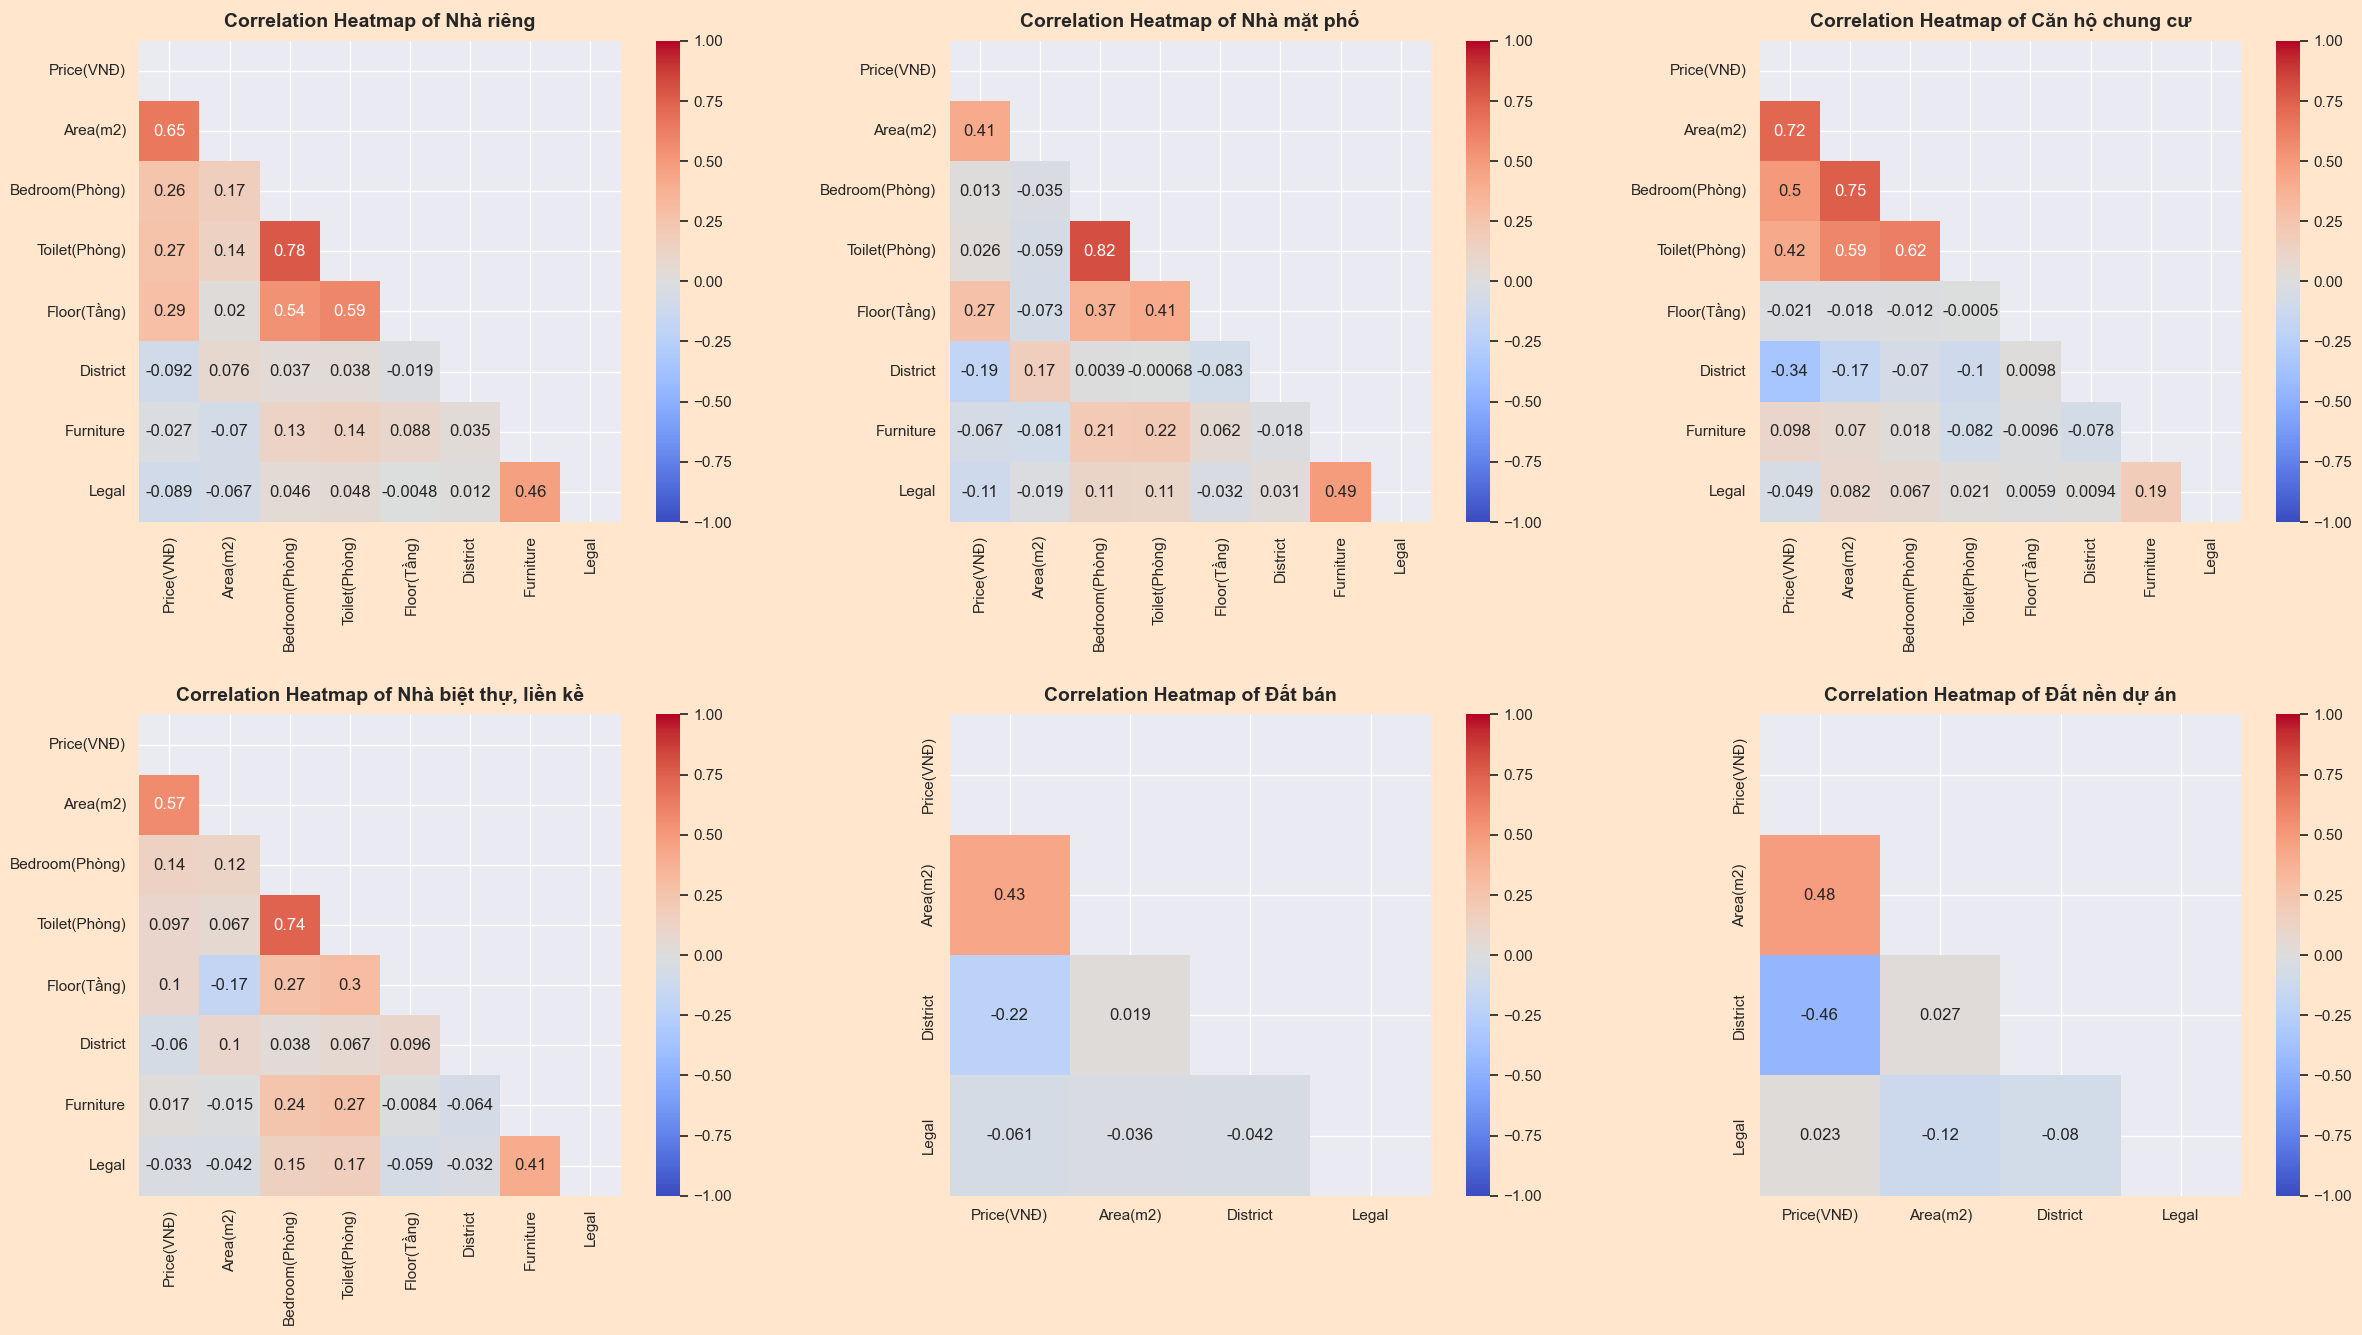

In [52]:
columns_to_correlate1 = ['Price(VNĐ)', 'Area(m2)', 'Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'District', 'Furniture', 'Legal']
columns_to_correlate2 = ['Price(VNĐ)', 'Area(m2)', 'District', 'Legal']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

sns.set()
i = 0
for type in real_estate_df_by_type:
    if type in ('Đất bán', 'Đất nền dự án'):
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate2].corr()
    else:
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate1].corr()
    ax = axes[i//3, i%3]
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1, ax= ax, mask= mask)
    ax.set_title(f'Correlation Heatmap of {type}', fontsize = '14', fontweight = 'bold', pad = 10)
    i += 1

plt.subplots_adjust(wspace=0.15, hspace=0.4)
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

By these heat map, we can see that: 

- With type `Nhà riêng`, `Căn hộ chung cư`:

    - The correlation is quite similar, with a strong correlation between the `Price` with `Area`, `Bedroom`,` Toilet`. That indicates that the these factors is the important criterian for a person to determine the price of the real estate.

    - The difference here is the `Floor`, while there is a high correlation with `Price` of `Nhà riêng`, the correlation in `Căn hộ chung cư` is quite low. The reason here is that the meaning of `Floor` in `Chung cư` have the different meaning with other. The floor here is the floor that this apartment located, not number of floor like other types.

    - There is the low correlation between the `Price` with `District`, `Legal`, `Furniture`. It means `District`, `Legal`, `Furniture` are not affect the `Price` much.

- Beside that, with `Nhà mặt phố`, just show that the correlation between `Price` with other factors is not very high. Some notable factors are `Area` and `Floor`.

- With `Đất bán ` and `Đất nền dự án`, both of them have the strong correlation between the `Price` with `Area`, negative correlation between `Price` and `District`

Overall, we can see that for all types of real eastate, there are a good correlation between the `Price` with `Area`, `Bedroom`, `Toilet`, `Floor` for just types that is not `Căn hộ chung cư`. Also, there is a low relationship with `District`, `Furniture` and `Legal`, show that these factor not affect so much to the `Price` of a real estate.

Anyway, The realationship between `Price` with other factors are different between each type of real estate.